In [ ]:
#Exercice 1
import scipy as stats
print("Version:", stats.__version__)

Version: 1.15.3


In [ ]:
#Exercice 2
from scipy import stats
import numpy as np

data = [12, 15, 13, 12, 18, 20, 22, 21]

data_mean = stats.tmean(data)
data_media = np.median(data) # Car galère avec scipy
data_variance = stats.tvar(data)
data_std_dev = stats.tvar(data)

print("Data mean:", data_mean)
print("Data median:", data_media)
print("Data variance:", data_variance)
print("Data standard deviation:", data_std_dev)

Data mean: 16.625
Data median: 16.5
Data variance: 17.125
Data standard deviation: 17.125


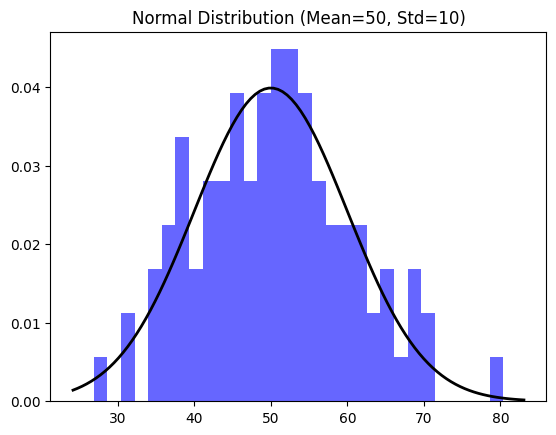

In [50]:
#Exercice 3
import matplotlib.pyplot as plt
from scipy.stats import norm, t, binom

mean_val = 50
std_val = 10
size = 100

data_generation = np.random.normal(mean_val, std_val, size)

plt.hist(data_generation, bins=30, density=True, alpha=0.6, color='b')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mean_val, std_val)
plt.plot(x, p, 'k', linewidth=2)
plt.title("Normal Distribution (Mean=50, Std=10)")
plt.show()




In [39]:
#Exercice 4
data1 = np.random.normal(50, 10, 100)
data2 = np.random.normal(60, 10, 100)
t_stat, p_val = stats.ttest_ind(data1, data2)
print("T-stat:", t_stat)
print("P-value:", p_val)
df = len(data1) + len(data2) - 2 # 100 + 100 -2

alpha = 0.05
critical_value = t.ppf(1 - alpha/2, df)

print(alpha)
print(critical_value)


T-stat: -5.848985901332714
P-value: 2.0168337320388036e-08
0.05
1.9720174778338955


In [ ]:
#Exercice 5

house_sizes = np.array([50, 70, 80, 100, 120])
house_prices = np.array([150000, 200000, 210000, 250000, 280000])

regression_result = stats.linregress(house_sizes, house_prices)
print("Slope:", regression_result.slope)
print("Intercept at:", regression_result.intercept)

y_price = regression_result.slope * 90 + regression_result.intercept
print(y_price)
print("Predicted price for a 90m² house:", y_price)



Slope: 1828.7671232876712
Intercept at: 64383.56164383562
228972.60273972602


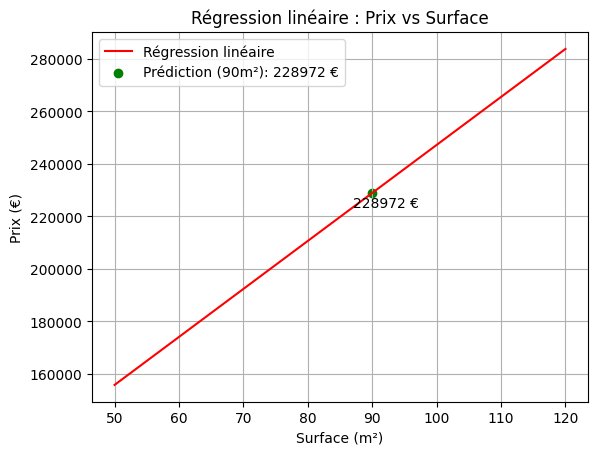

In [45]:
x_line = np.linspace(house_sizes.min(), house_sizes.max(), 100)
y_line = regression_result.slope * x_line + regression_result.intercept
plt.plot(x_line, y_line, color='red', label='Régression linéaire')

# Tracé du point prédit
plt.scatter(90, y_price, color='green', label=f'Prédiction (90m²): {int(y_price)} €')
plt.annotate(f"{int(y_price)} €", (90, y_price), textcoords="offset points", xytext=(10,-10), ha='center')

# Ajout des labels et titre
plt.xlabel('Surface (m²)')
plt.ylabel('Prix (€)')
plt.title('Régression linéaire : Prix vs Surface')
plt.legend()
plt.grid(True)
plt.show()

In [46]:
#Exercice 6

fertilizer_1 = [5, 6, 7, 6, 5]
fertilizer_2 = [7, 8, 7, 9, 8]
fertilizer_3 = [4, 5, 4, 3, 4]

f_value, p_value = stats.f_oneway(fertilizer_1, fertilizer_2, fertilizer_3)
print("F-value:", f_value)
print("P-value:", p_value)


F-value: 28.52631578947368
P-value: 2.754267209804844e-05


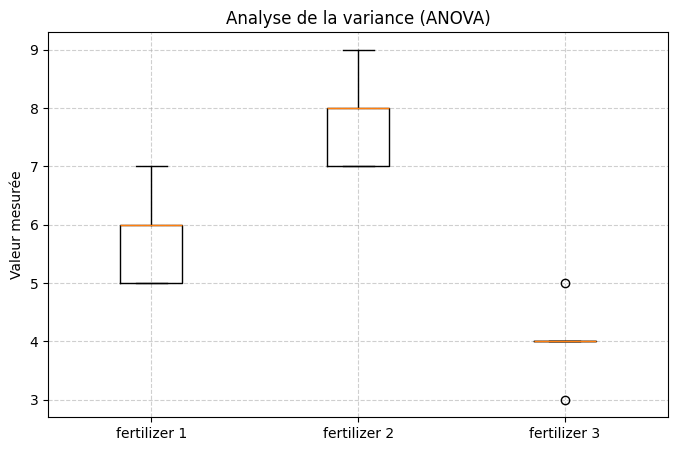

In [49]:
plt.figure(figsize=(8, 5))
plt.title("Analyse de la variance (ANOVA)")
plt.ylabel("Valeur mesurée")
plt.grid(True, linestyle="--", alpha=0.6)

# Visualisation
plt.boxplot([fertilizer_1, fertilizer_2, fertilizer_3], tick_labels=["fertilizer 1", "fertilizer 2", "fertilizer 3"])
plt.show()

In [52]:
#Exercice 7

n, p = 10, 0.5
succes = 5
prob_5_heads = binom.pmf(succes, n, p)
print("Probability of exactly 5 heads in 10 flips:", prob_5_heads)

Probability of exactly 5 heads in 10 flips: 0.24609375


In [55]:
# Exo 8
import pandas as pd
df_corr = pd.DataFrame({'age': [23, 25, 30, 35, 40],'income': [35000, 40000, 50000, 60000, 70000]})
pearson_corr, _ = stats.pearsonr(df_corr['age'], df_corr['income'])
spearman_corr, _ = stats.spearmanr(df_corr['age'], df_corr['income'])

print("Pearson correlation coefficient:", pearson_corr)
print("Spearman correlation coefficient:", spearman_corr)

Pearson correlation coefficient: 0.9996907452347201
Spearman correlation coefficient: 0.9999999999999999


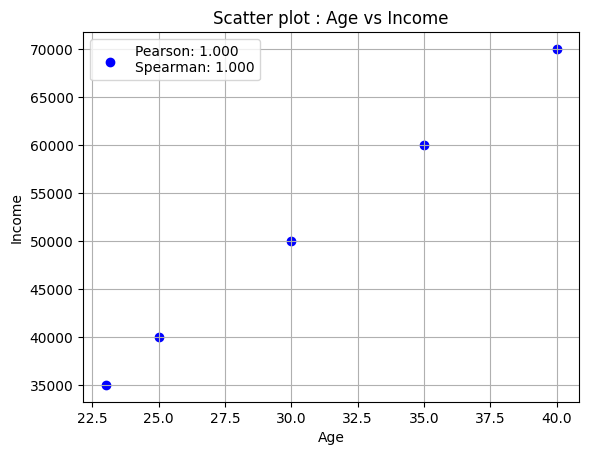

In [56]:
plt.scatter(df_corr['age'], df_corr['income'], color='blue')

# Ajout des titres et labels
plt.title('Scatter plot : Age vs Income')
plt.xlabel('Age')
plt.ylabel('Income')

# Affichage des coefficients dans la légende
plt.legend([f"Pearson: {pearson_corr:.3f}\nSpearman: {spearman_corr:.3f}"])

plt.grid(True)
plt.show()